## Task: Divide the image into rows

# Imports

In [4]:
import cv2
import numpy as np
import pandas as pd
import math

from skimage import io

from time import strftime

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [5]:
shelf_1_column_1="column_0.png"
shelf_1_column_2="column_1.png"
shelf_2_column_1="shelf2/columns/column_0.png"
shelf_2_column_2="shelf2/columns/column_1.png"
shelf_2_column_3="shelf2/columns/column_2.png"

# Analyze image

### Preprocessing

In [6]:
img = cv2.cvtColor(io.imread(shelf_1_column_1), cv2.COLOR_RGB2BGR)
img.shape

(500, 293, 3)

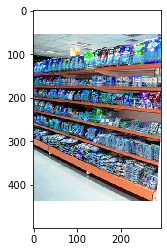

In [7]:
plt.imshow(img, interpolation='nearest')
plt.show()

#### convert to grey scale

In [8]:
img_thr_inv = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 120, 255, cv2.THRESH_BINARY)[1]
img_thr_inv.shape

(500, 293)

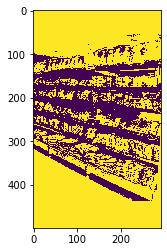

In [9]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()

### Using gausian blur with OTSU

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

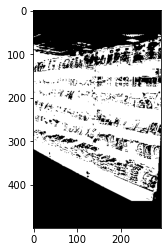

In [11]:
plt.imshow(img_thr, 'gray')
plt.show()

In [45]:
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, 1, math.pi/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (255,255,255), 3)
cv2.imwrite("temp1.png", img)

True

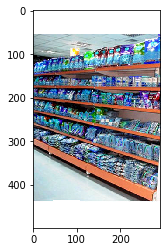

In [48]:
plt.imshow(deskewed_img, interpolation='nearest')
plt.show()

#### crop image to remove white blocks

In [19]:
coords = cv2.findNonZero(img_thr)
x, y, w, h = cv2.boundingRect(coords) 
rect = img[y:y+h, x:x+w] 
cv2.imwrite("rect.png", rect)

True

In [20]:
cropped_img = cv2.imread("rect.png")

In [23]:
deskewed_img = deskew(cropped_img)

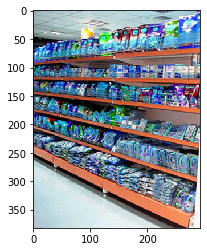

In [24]:
plt.imshow(deskewed_img, interpolation='nearest')
plt.show()

In [27]:
gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)


In [29]:
img_thr_inv = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 120, 255, cv2.THRESH_BINARY)[1]
img_thr_inv.shape

(382, 293)

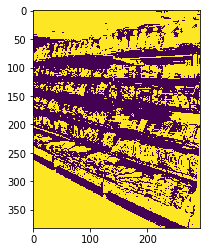

In [30]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()